<a href="https://colab.research.google.com/github/janusis/AIFFEL_Exploration/blob/main/MainQuest/MainQuest_02/Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


In [ ]:
original_data = pd.read_csv('https://raw.githubusercontent.com/janusis/AIFFEL_Exploration/main/Machine_Learning/Main_Quest/data/Pokemon.csv')
print('슝=3')

슝=3


In [ ]:
original_data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [ ]:
# 일반 포켓몬의 데이터셋
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
# 결측치 확인
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [ ]:
# 전체 컬럼 출력
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

### 컬럼 내용
'#' : 포켓몬 Id number. 성별이 다르지만 같은 포켓몬인 경우 등은 같은 #값을 가진다. int  
Name : 포켓몬 이름. 포켓몬 각각의 이름으로 저장되고, 800개의 포켓몬의 이름 데이터는 모두 다르다. (unique) str  
Type 1 : 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력된다. str  
Type 2 : 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가진다. str  
Total : 전체 6가지 스탯의 총합. int  
HP : 포켓몬의 체력. int  
Attack : 물리 공격력. (scratch, punch 등) int  
Defense : 물리 공격에 대한 방어력. int  
Sp. Atk : 특수 공격력. (fire blast, bubble beam 등) int  
Sp. Def : 특수 공격에 대한 방어력. int  
Speed : 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정. (더 높은 포켓몬이 먼저 공격한다) int  
Generation : 포켓몬의 세대. 현재 데이터에는 6세대까지 있다. int  
Legendary : 전설의 포켓몬 여부. !! Target feature !! bool  

In [ ]:
# '#'컬럼의 중복 값 여부 확인
len(set(pokemon["#"]))

721

전체 데이터는 총 800개인데 #컬럼을 집합으로 만든 자료형은 그보다 작은 721개의 데이터를 가집니다. 파이썬의 집합(set) 자료형은 중복 데이터를 가질 수 없죠? 따라서 집합의 크기가 800이 아니라 721이므로 # 컬럼의 값은 unique하지 않으며(index로 쓸 수 없으며), 같은 번호를 가지는 컬럼들이 있음을 알 수 있습니다.

In [ ]:
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [ ]:
# 'Name'컬럼의 중복 값 여부 확인 - 중복된 값이 없으므로  index로 활용 가능
len(set(pokemon["Name"]))

800

In [ ]:
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [ ]:
# Type 1 과 Type 2 컬럼의 데이터 수 확인
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

In [ ]:
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Poison', 'Dark', 'Ghost', 'Bug', 'Electric', 'Flying', 'Grass', 'Fire', 'Steel', 'Psychic', 'Ice', 'Rock', 'Fairy', 'Dragon', 'Water', 'Ground', 'Normal', 'Fighting']


In [ ]:
# Type 2 값이 없는 데이터 수 확인
pokemon["Type 2"].isna().sum()

386

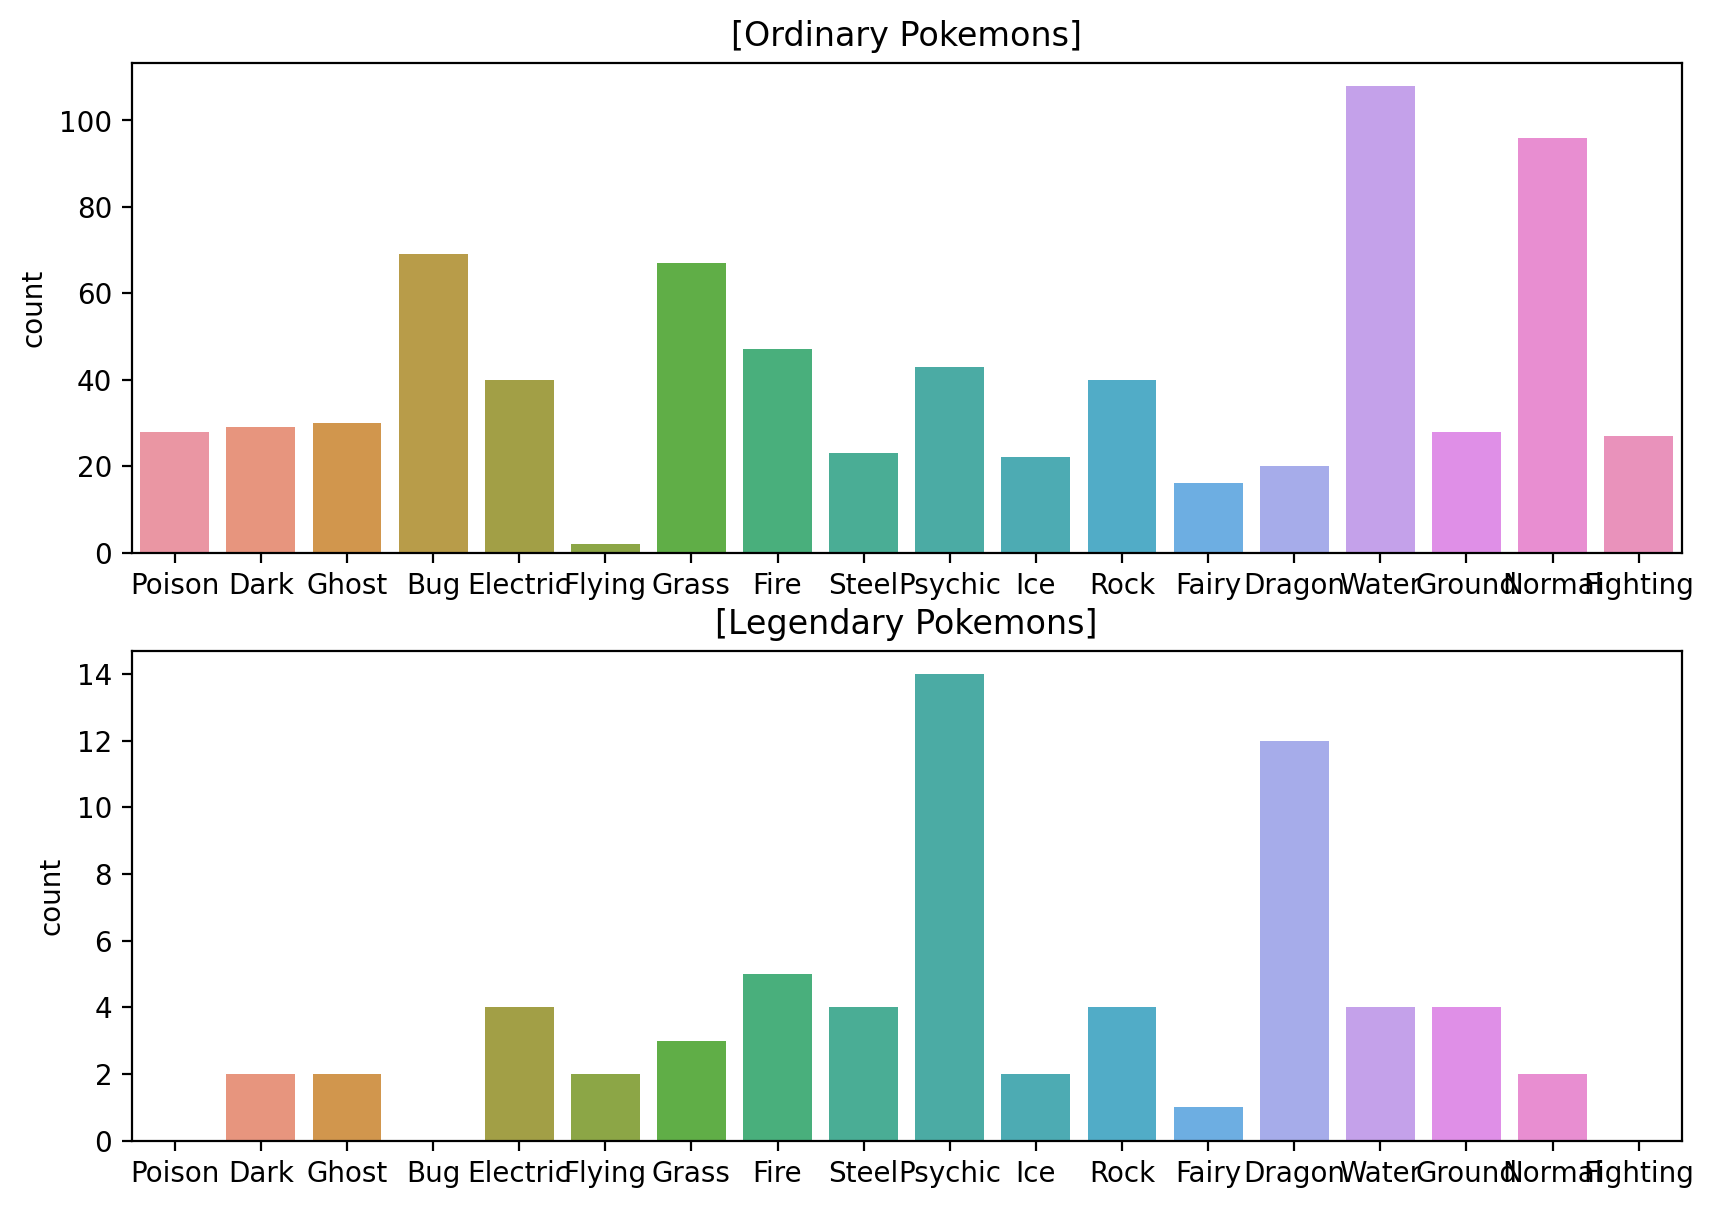

In [ ]:
# Type 1 데이터 분포 plot
plt.figure(figsize=(10, 7))  # 화면 해상도에 따라 그래프 크기를 조정

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [ ]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


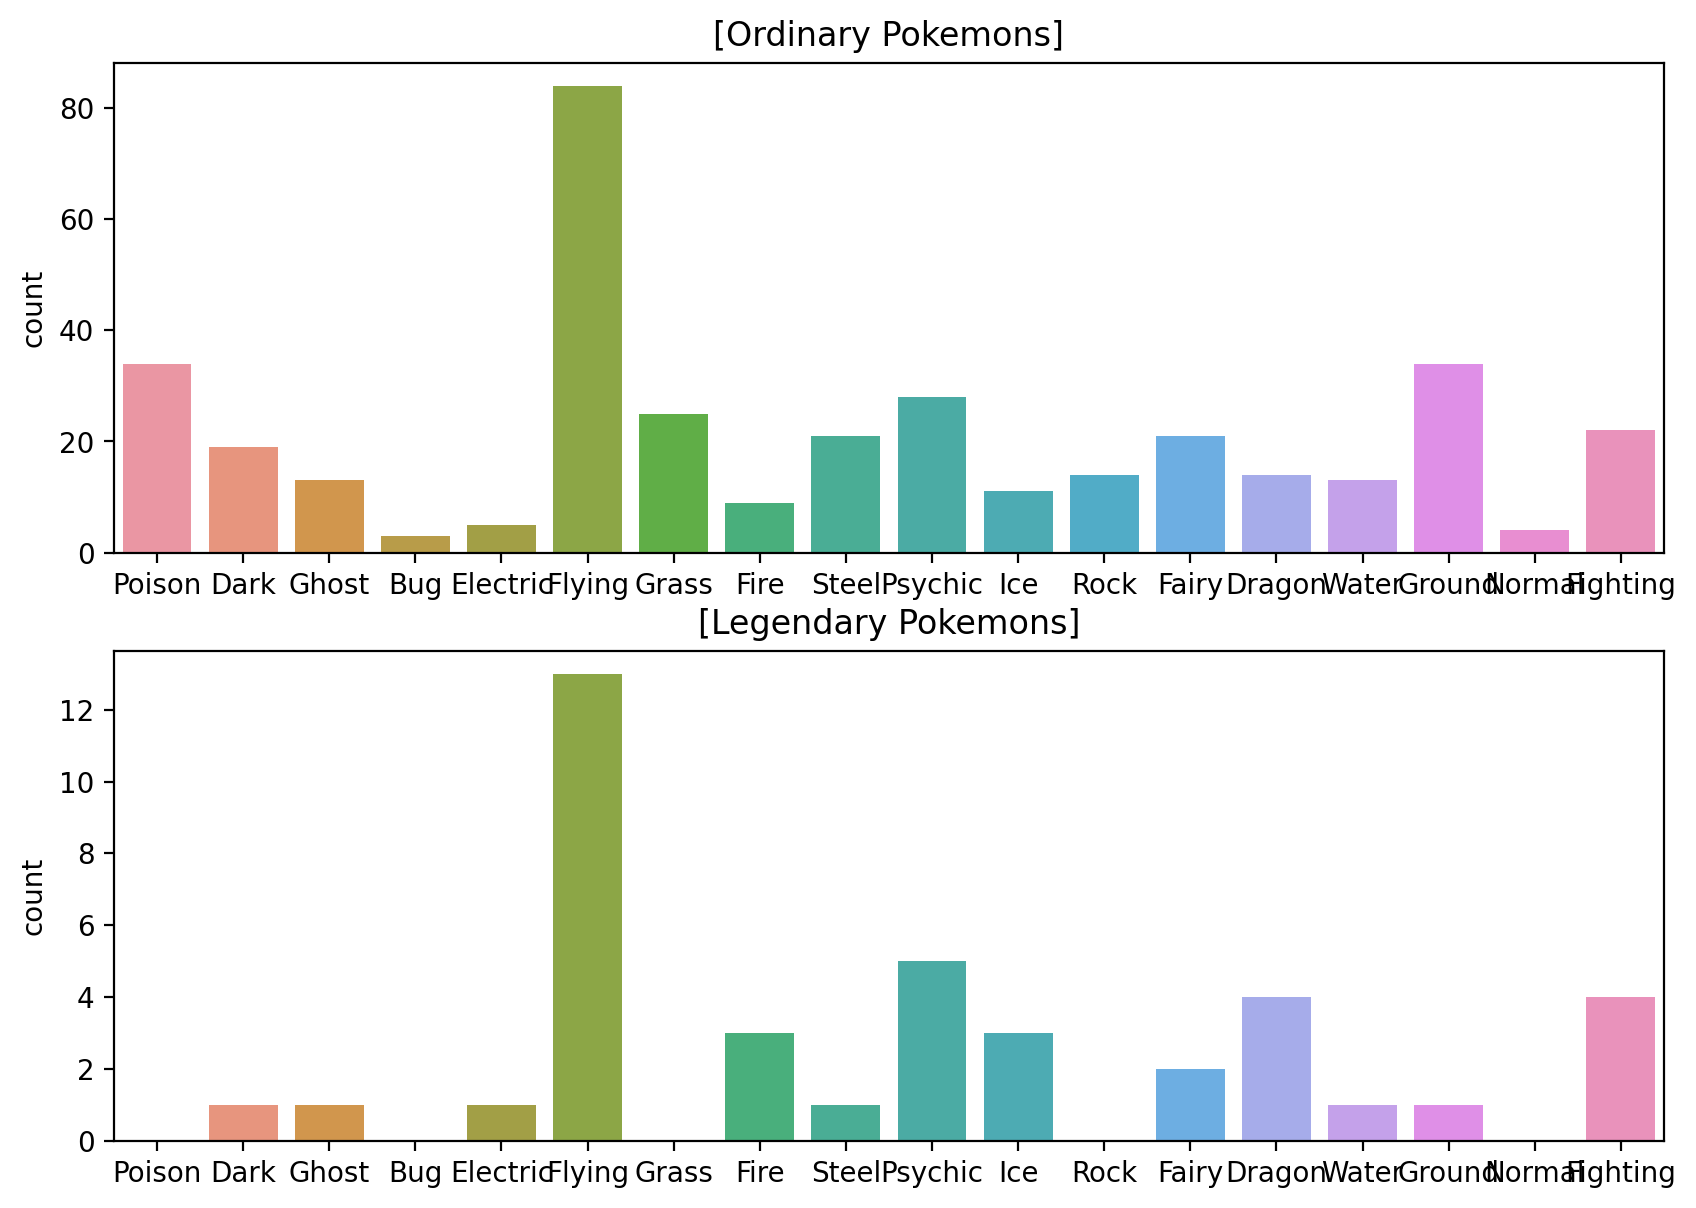

In [ ]:
# Type 2 데이터 분포 plot
plt.figure(figsize=(10, 7))  # 화면 해상도에 따라 그래프 크기를 조정

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [ ]:
# Type2별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


In [ ]:
# 모든 스탯의 종류를 stats라는 변수에 저장
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [ ]:
# 데이터 검증
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [ ]:
total_sum = pokemon[stats].sum(axis=1)  # 각 포켓몬의 위 열들의 합을 계산

# "Total" 열의 값과 위 열들의 합이 같은 경우를 확인
(total_sum == pokemon['Total']).sum()

800

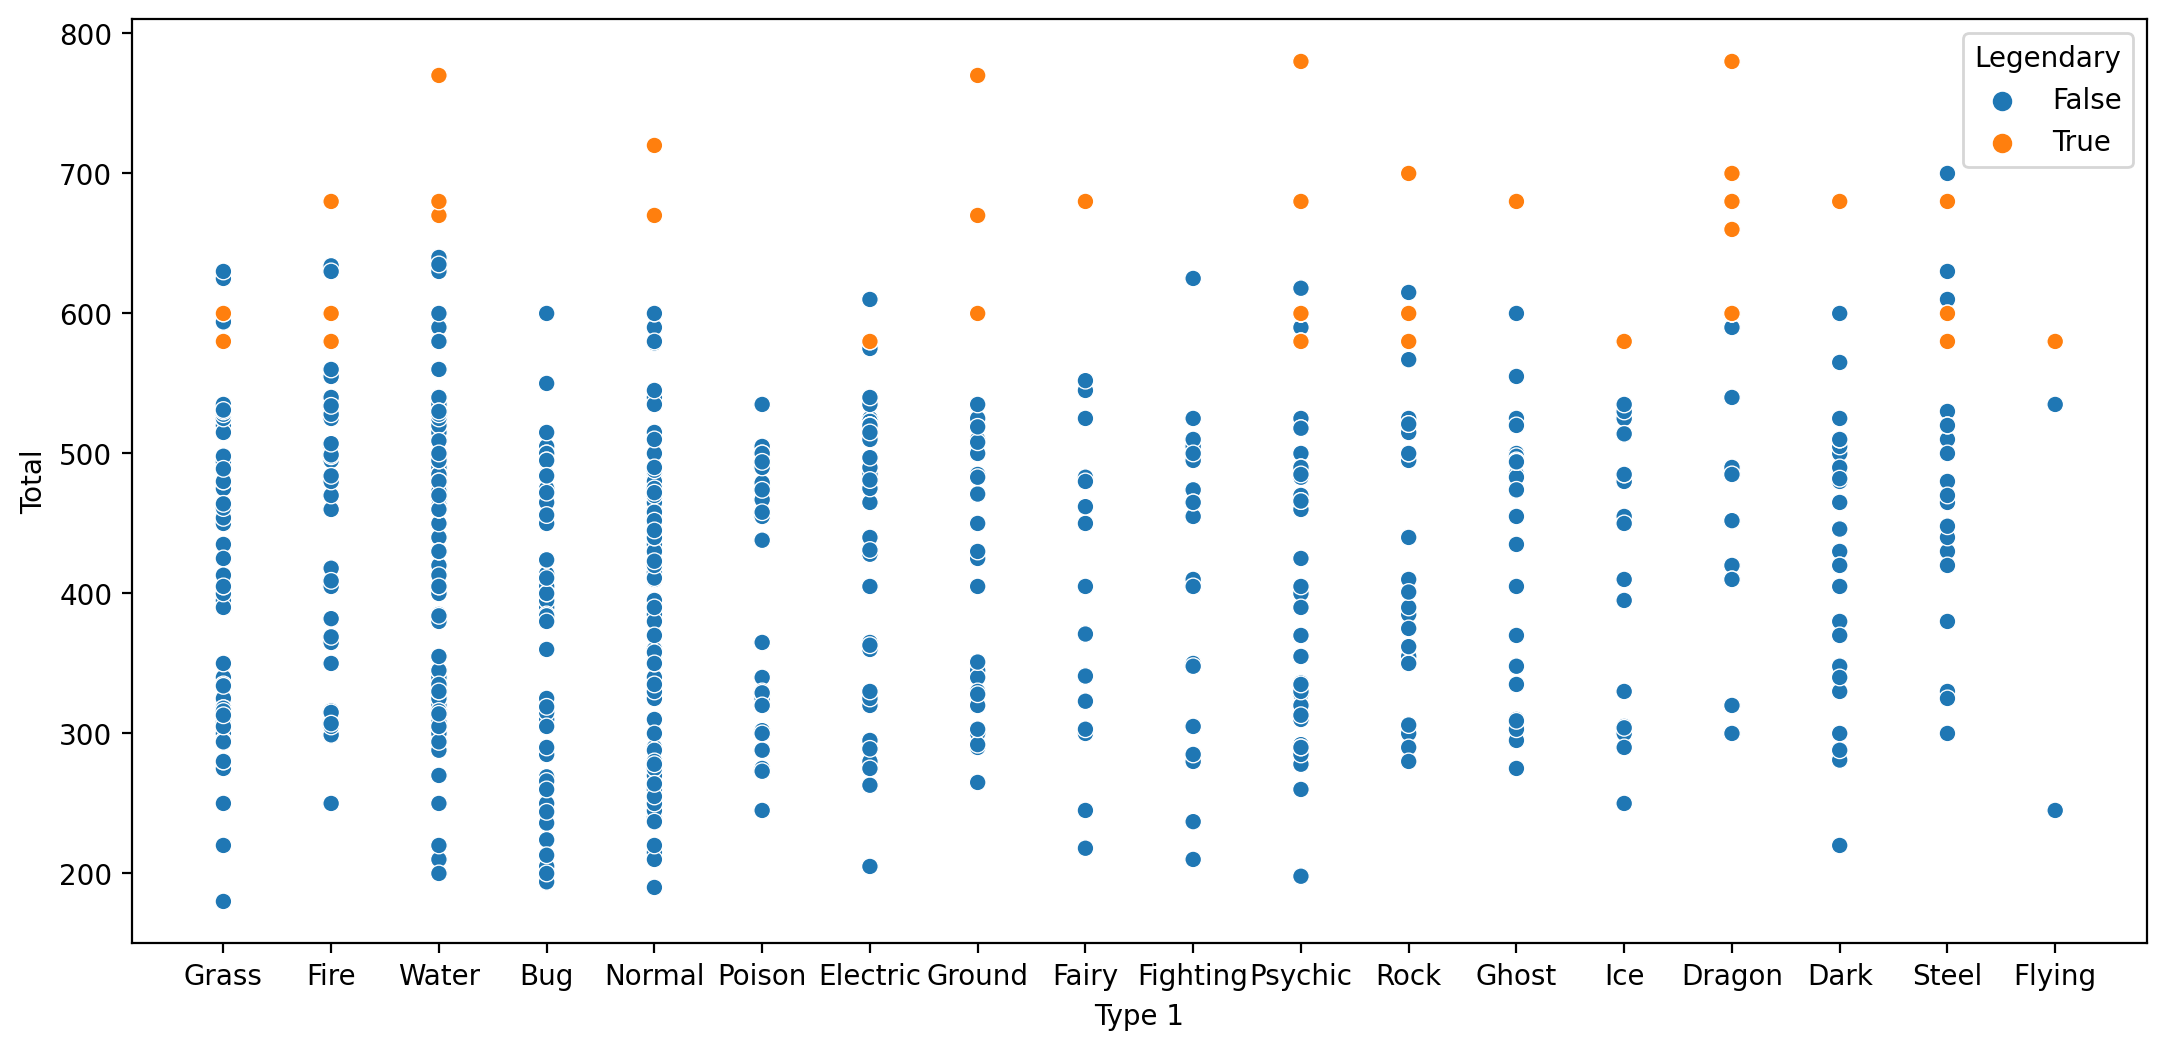

In [ ]:
# Total값에 따른 분포 plot
fig, ax = plt.subplots()
fig.set_size_inches(13, 6)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

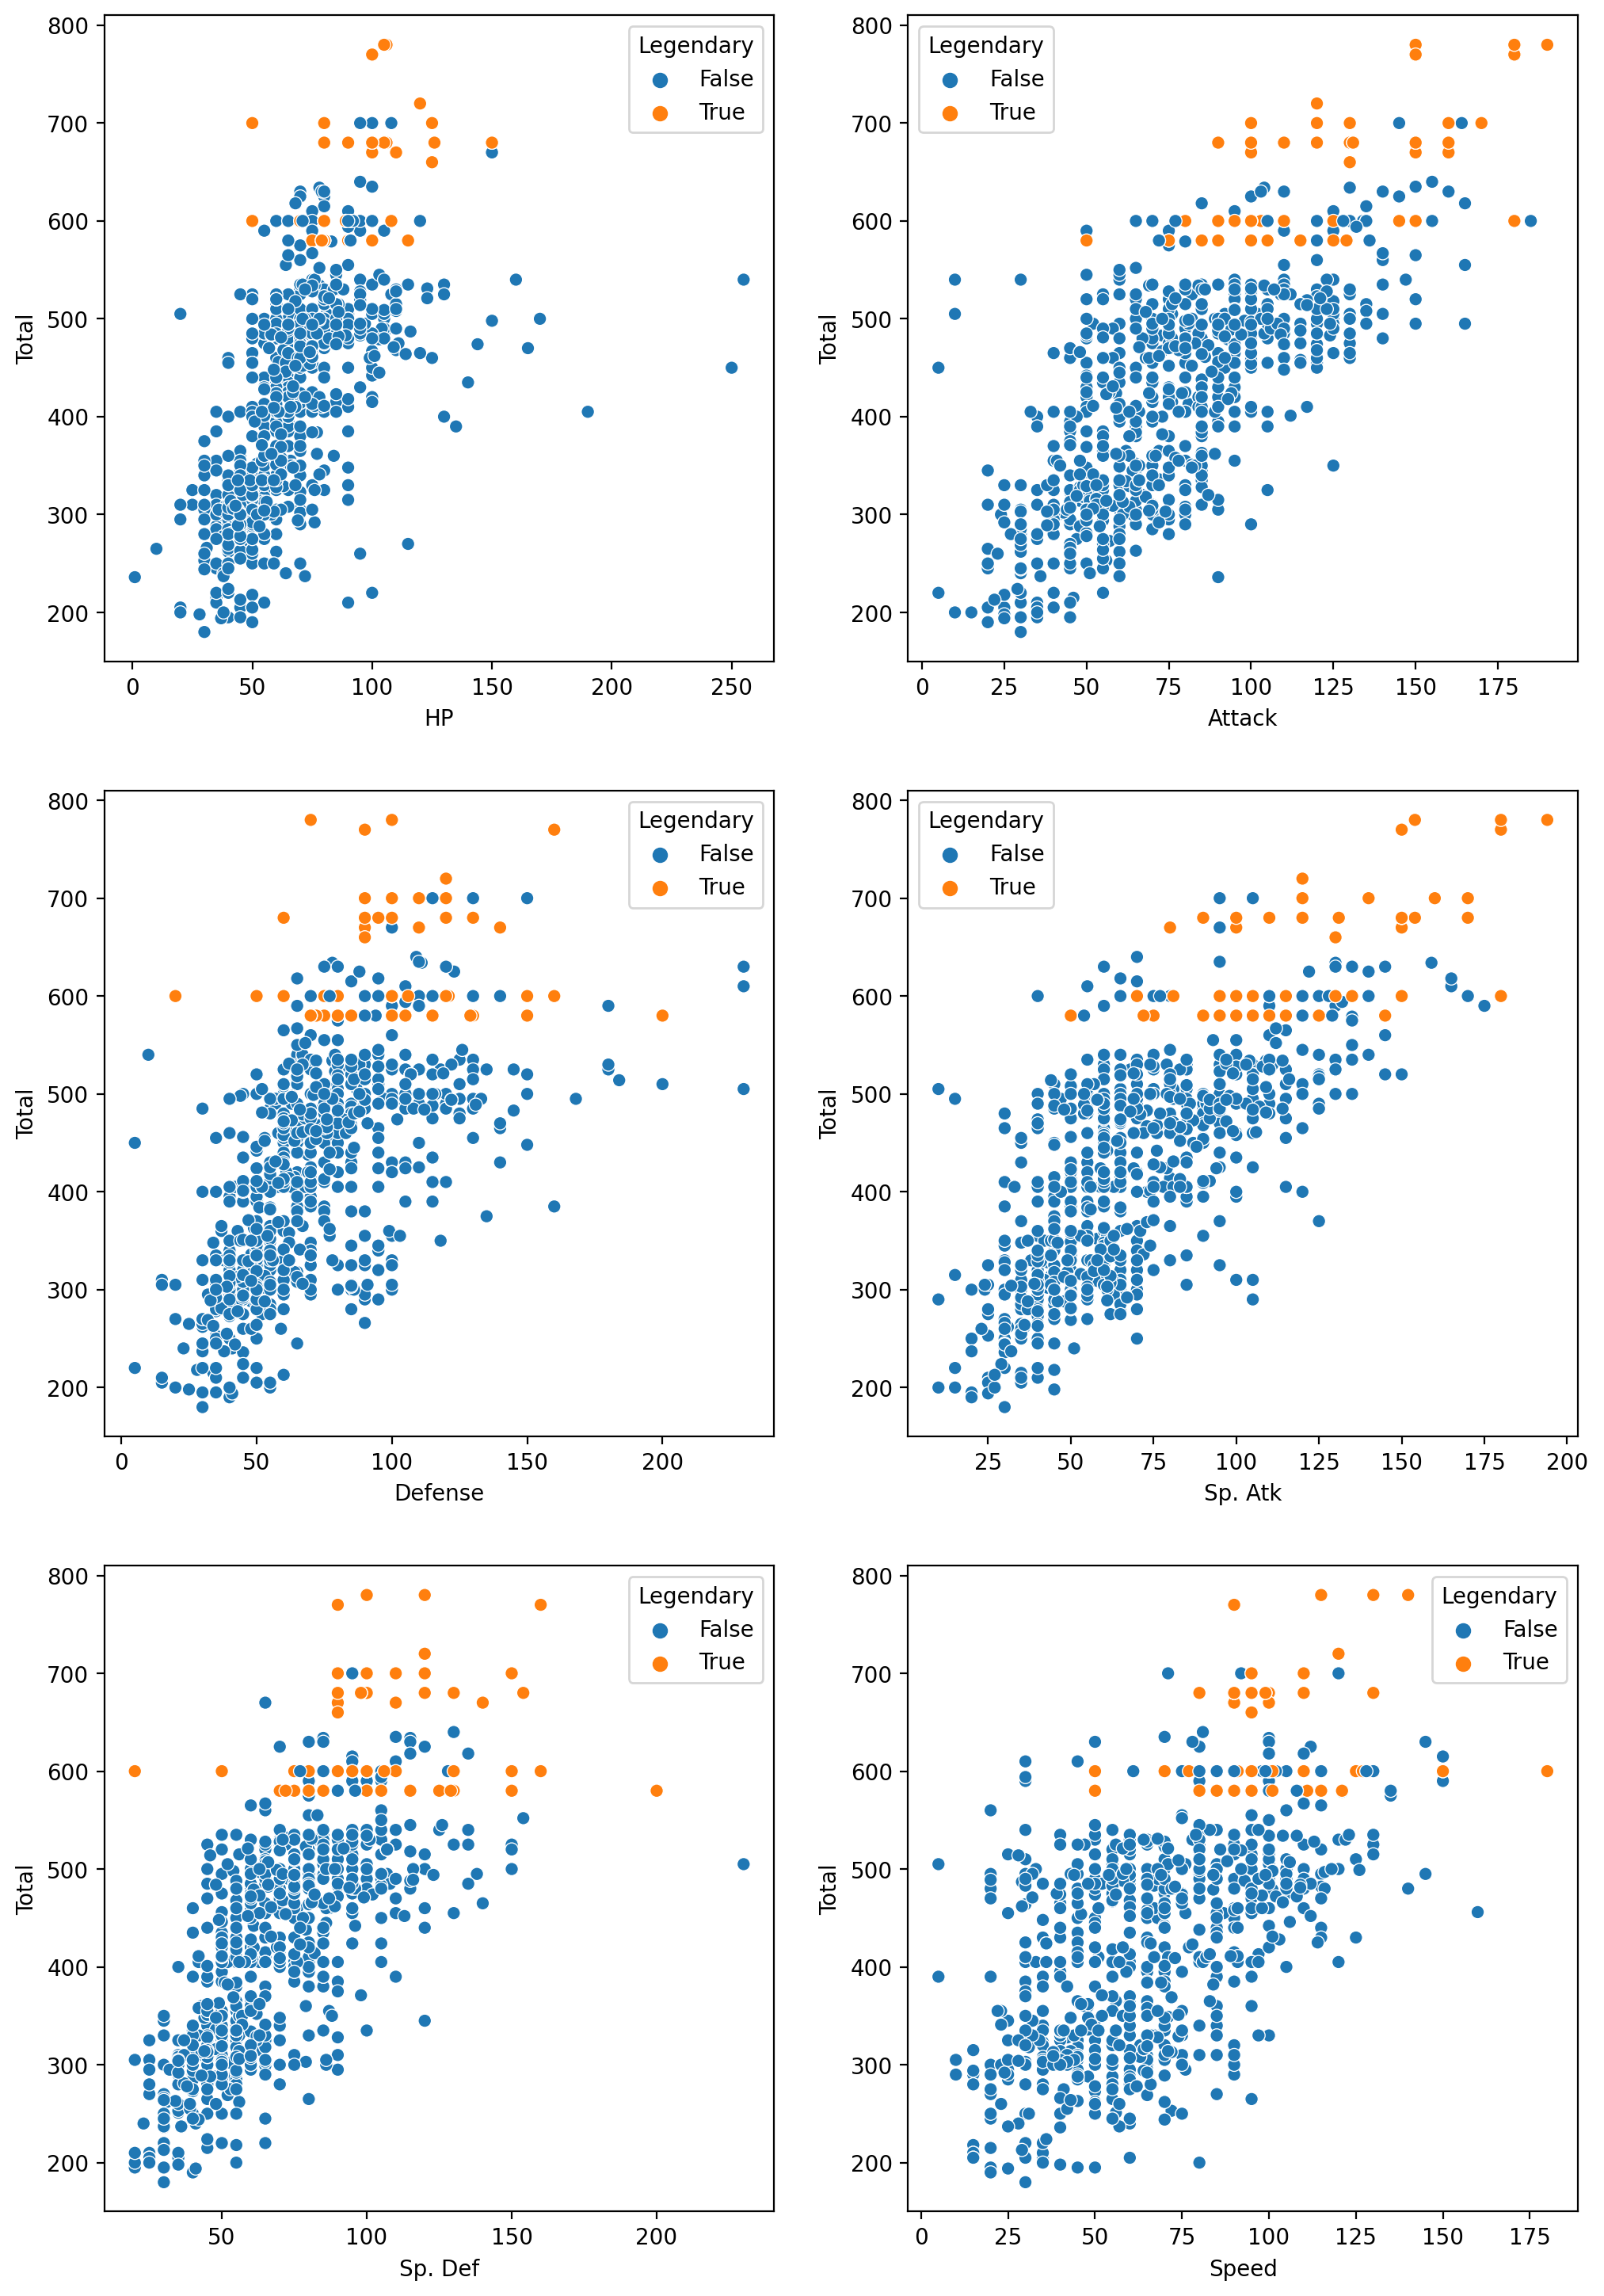

In [ ]:
# 각각의 스탯에 대한 scatter plot을 6개의 subplot으로 표현

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)

plt.show()

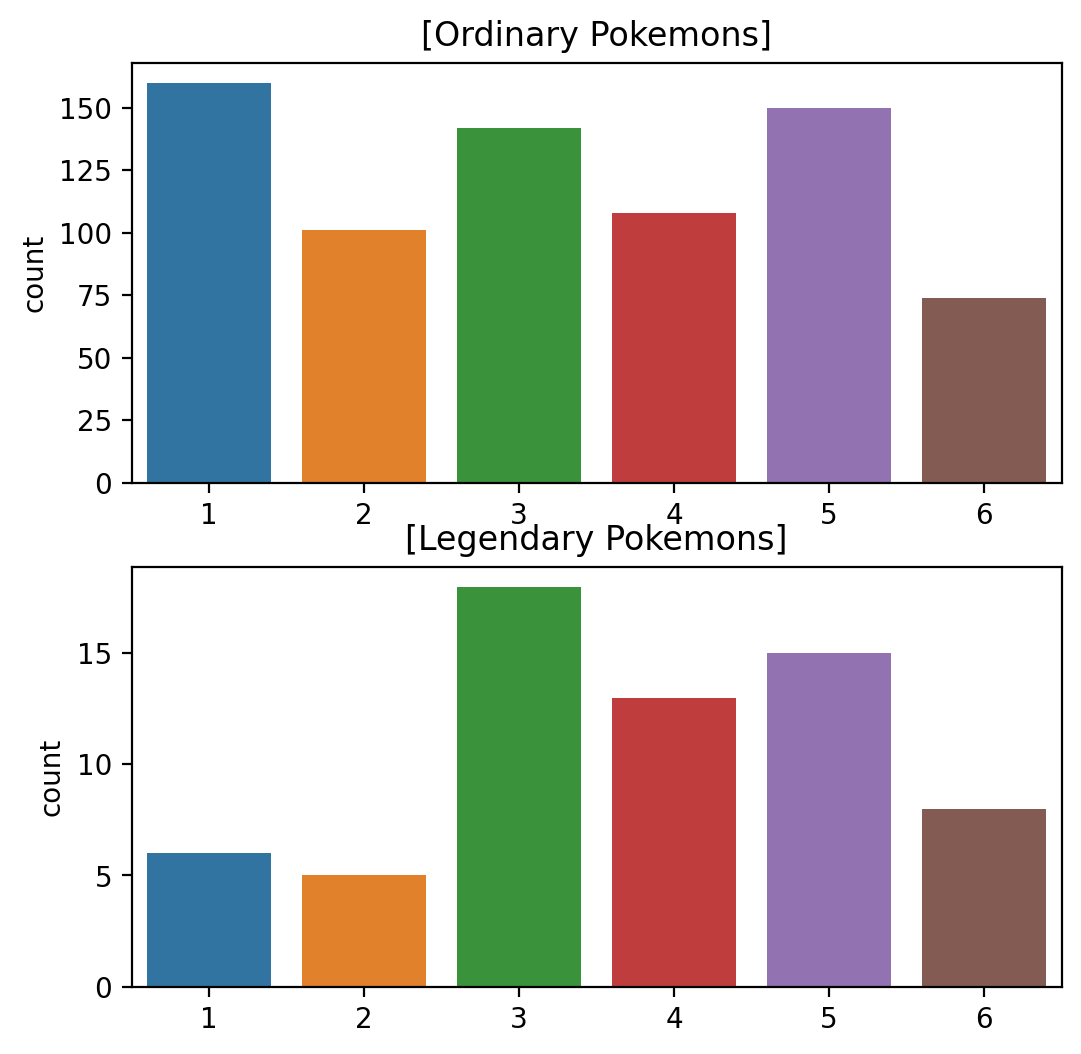

In [ ]:
# 각 세대에 대한 포켓몬의 수를 확인
plt.figure(figsize=(6, 6))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

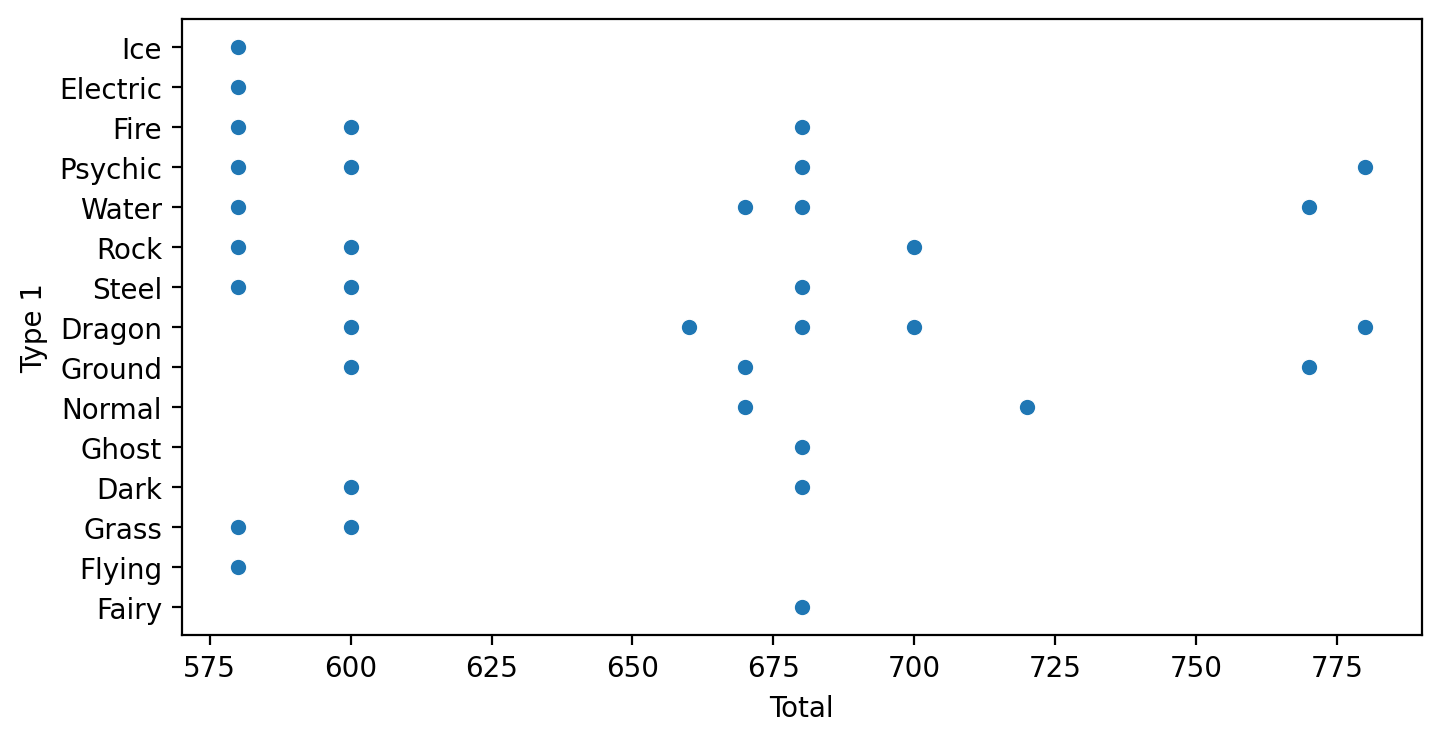

In [ ]:
# 전설의 포켓몬들의 Total 값을 속성(Type 1)별로 확인
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

In [ ]:
# 전설의 포켓몬이 가지는 Total값들의 집합을 확인
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


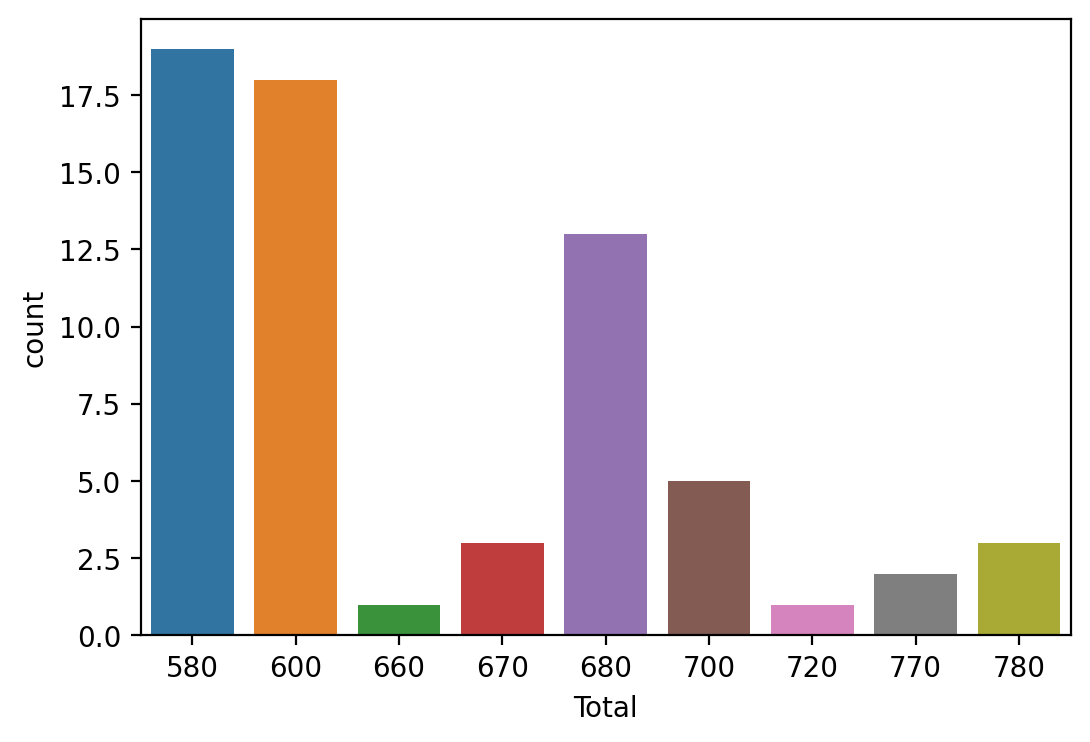

In [ ]:
# 전설의 포켓몬이 가지는 각 Total값에 대한 포켓몬 수를 확인
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [ ]:
round(65 / 9, 2)

7.22

In [ ]:
# ordinary 포켓몬의 'Total' 값 집합을 확인
print(sorted(list(set(ordinary["Total"]))))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


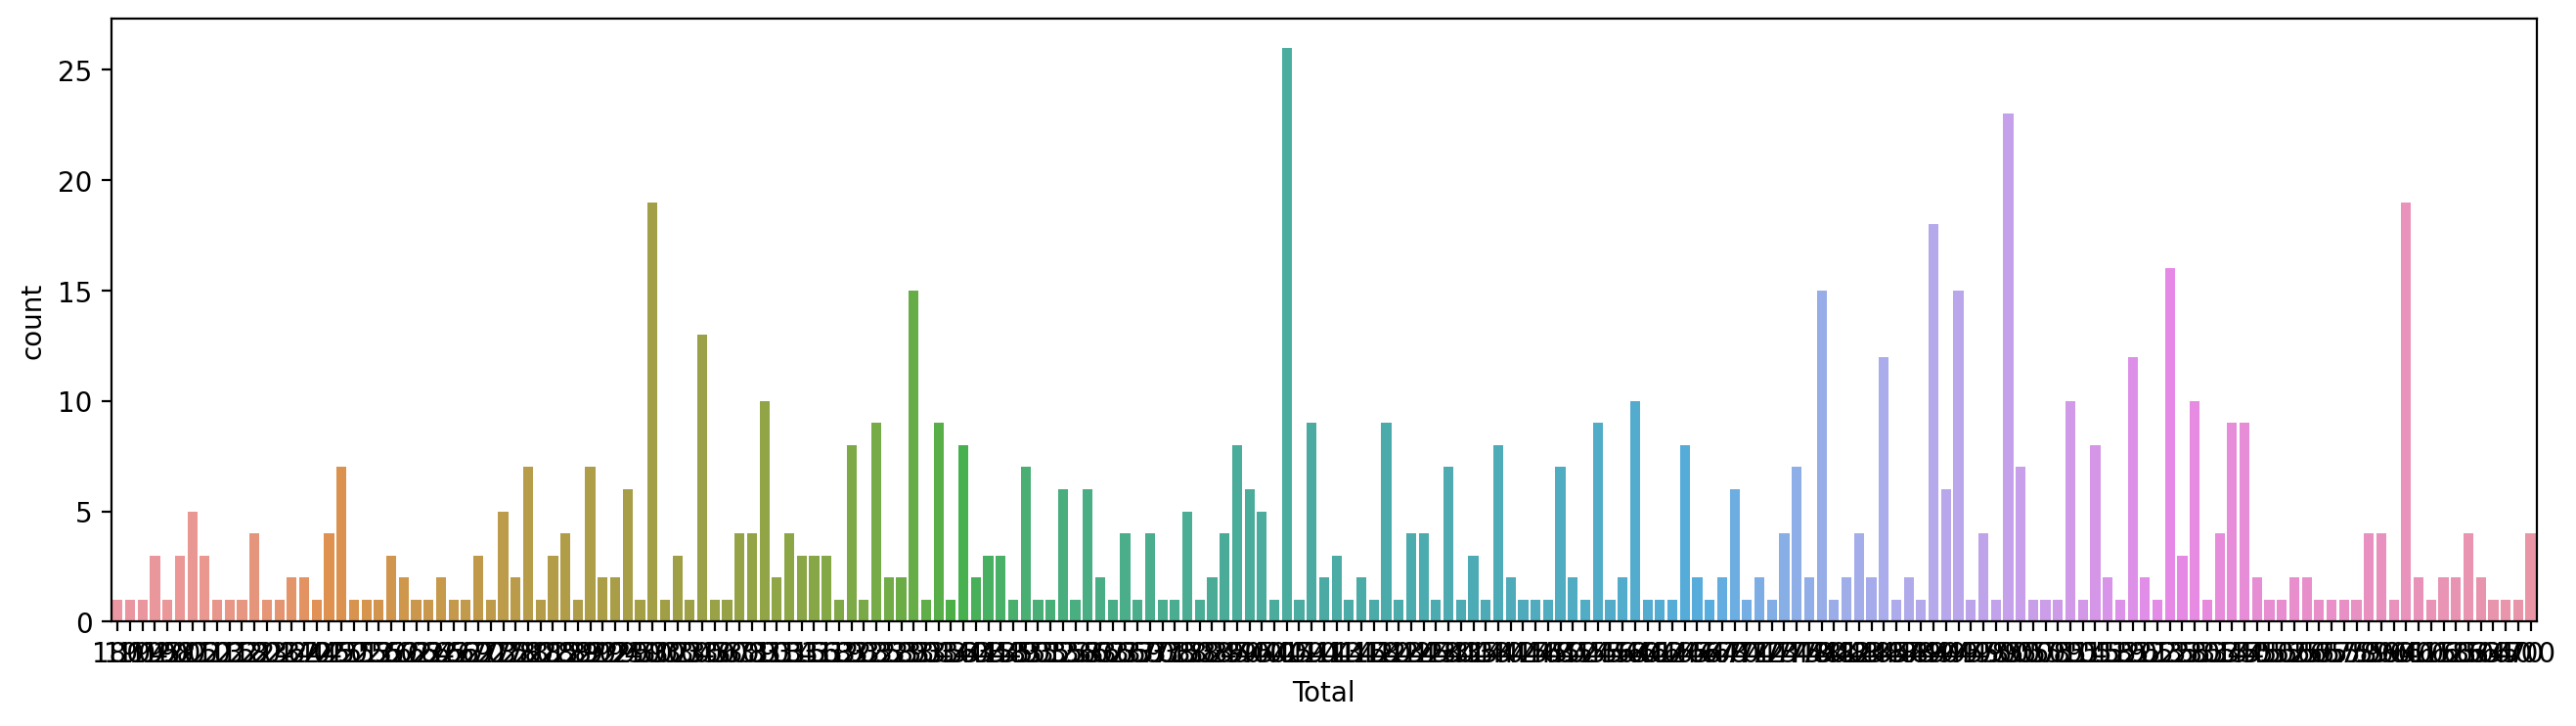

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 4)

sns.countplot(data=ordinary, x="Total")
plt.show()

In [ ]:
round(735 / 195, 2)

3.77

- Total값의 다양성은 일반 포켓몬이 전설의 포켓몬보다 두 배 가까이 됩니다. 즉 전설의 포켓몬의 Total값은 다양하지 않습니다.
: 한 포켓몬의 Total 속성값이 전설의 포켓몬의 값들 집합에 포함되는지의 여부는 전설의 포켓몬임을 결정하는 데에 영향을 미칩니다.

- 전설의 포켓몬의 Total 값 중에는 일반 포켓몬이 가지지 못하는 Total값이 존재합니다. ex) 680, 720, 770, 780
: Total값은 전설의 포켓몬인지 아닌지를 결정하는 데에 이러한 방식으로도 영향을 미칠 수 있습니다.

즉, Total값은 legendary인지 아닌지를 예측하는 데에 중요한 컬럼일 것이라는 결론을 내릴 수 있습니다.

In [ ]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [ ]:
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


In [ ]:
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [ ]:
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


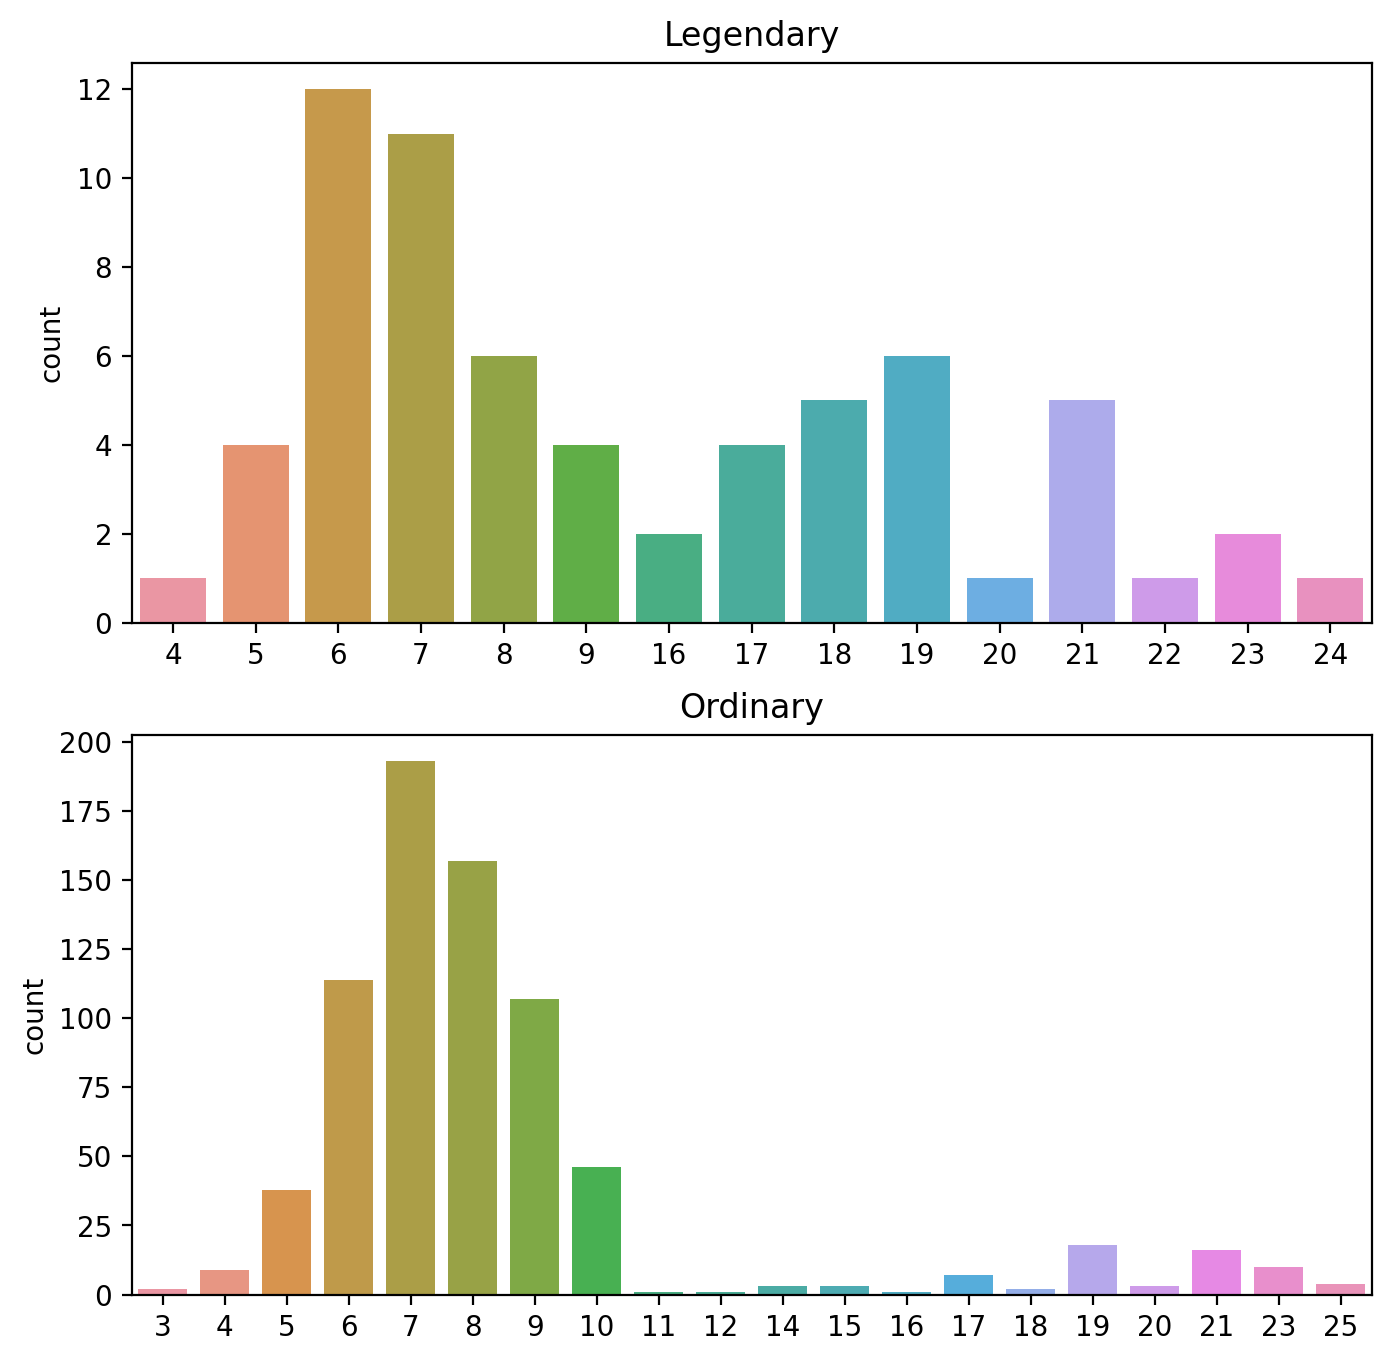

In [ ]:
plt.figure(figsize=(8, 8))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

In [ ]:
# 전설의 포켓몬의 이름이 10 이상일 확률
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [ ]:
# 일반 포켓몬의 이름이 10글자 이상일 확률
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


전설의 포켓몬의 이름이 10 이상일 확률은 41% 를 넘는 반면에, 일반 포켓몬의 이름이 10 이상일 확률은 약 16% 밖에 안됨을 확인할 수 있습니다!  
이는 아주 큰 차이이므로 legendary인지 아닌지를 구분하는 데에 큰 의미가 있습니다.  

위의 두 가지, 이름에 대한 분석은 중요한 시사점을 가집니다.  

- 만약 "Latios"가 전설의 포켓몬이라면, "%%% Latios" 또한 전설의 포켓몬이다!
- 적어도 전설의 포켓몬에서 높은 빈도를 보이는 이름들의 모임이 존재한다!
- 전설의 포켓몬은 긴 이름을 가졌을 확률이 높다!

In [ ]:
# pokemon 데이터 프레임에 이름의 길이를 확인할 수 있는 name_count 컬럼을 생성
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [ ]:
# 이름의 길이가 10 이상이면 True, 미만이면 False를 가지는 long_name 컬럼을 생성
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


포켓몬의 이름에 대해 먼저 알아보겠습니다.  
포켓몬의 이름은 총 네 가지 타입으로 나뉩니다.  

1. 한 단어면 ex. Venusaur
2. 두 단어이고, 앞 단어는 두 개의 대문자를 가지며 대문자를 기준으로 두 부분으로 나뉘는 경우 ex. VenusaurMega Venusaur
3. 이름은 두 단어이고, 맨 뒤에 X, Y로 성별을 표시하는 경우 ex. CharizardMega Charizard X
4. 알파벳이 아닌 문자를 포함하는 경우 ex. Zygarde50% Forme

In [ ]:
# 알파벳 체크를 위해 띄어쓰기가 없는 컬럼을 따로 만들어준 후, 띄어쓰기를 빈칸으로 처리해서 확인
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [ ]:
# isalpha() 함수를 이용해 이름이 알파벳으로만 이루어졌는지 확인
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [ ]:
# 알파벳이 아닌 다른 문자가 이름에 포함된 데이터 확인
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [ ]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [ ]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


이름을 띄어쓰기 & 대문자 기준으로 분리해 토큰화하기

그러면 이제 모든 이름은 세 가지 타입으로 나뉘므로 토큰화(tokenizing)할 수 있습니다.
이름에 있는 토큰을 추출하기 위해 이름을 토큰화 (모든 토큰으로 분리) 할 수 있는 함수를 생성해 주겠습니다.

문자열을 처리할 때는 주로 정규표현식(RegEx: Regular Expression) 이라는 기법이 사용됩니다.
정규표현식이란 문자열을 처리하는 방법의 하나로, 특정한 조건을 만족하는 문자를 검색하거나 치환하는 등의 작업을 하고 싶을 때 간편하게 처리할 수 있게 해주는 도구입니다.

정규표현식은 문자열을 다룰 때 아주 유용한 도구지만, 사실 깊게 들어가면 아주 복잡하고 어렵습니다.
따라서 오늘은 맛보기와 같은 형태로 코드를 받아들이면서 진행해 보겠습니다.

파이썬은 정규표현식을 re라는 패키지에서 지원합니다.

https://wikidocs.net/4308

In [ ]:
# 정규식 re 패키지
import re

[A-Z] : A부터 Z까지의 대문자 중 한 가지로 시작하고,  
[a-z] : 그 뒤에 a부터 z까지의 소문자 중 한 가지가 붙는데,  
`* : 그 소문자의 개수는 하나 이상인 패턴 (*는 정규표현식 중에서 "반복"을 나타내는 기호)  


re.findall('[A-Z][a-z]*', temp) <- 대문자로 시작해서 소문자로 끝나는 단어 분리 정규식

In [ ]:
# 이름을 토큰화
def tokenize(name):
    name_split = name.split(" ")
    tokens = []
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)

    return np.array(tokens)

In [ ]:
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

In [ ]:
from collections import Counter

In [ ]:
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

In [ ]:
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(types)

['Poison', 'Dark', 'Ghost', 'Bug', 'Electric', 'Flying', 'Grass', 'Fire', 'Steel', 'Psychic', 'Ice', 'Rock', 'Fairy', 'Dragon', 'Water', 'Ground', 'Normal', 'Fighting']


In [ ]:
# Type1 의 18개의 컬럼에 대해 원-핫 인코딩
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Poison,Dark,Ghost,Bug,Electric,Flying,Grass,Fire,Steel,Psychic,Ice,Rock,Fairy,Dragon,Water,Ground,Normal,Fighting
0,Grass,Poison,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,Grass,Poison,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,Grass,Poison,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,Grass,Poison,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,Fire,NaN,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


### 1-16. 가랏, 몬스터볼! (1) 가장 기본 데이터로 만드는 베이스라인

In [ ]:
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [ ]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
target = 'Legendary'

In [ ]:
target = 'Legendary'

In [ ]:
# original_data에서 features 데이터 추출
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [ ]:
# original_data에서 target 데이터 추출
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [ ]:
# 훈련 데이터와 학습 데이터로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


### 1-17. 가랏, 몬스터볼! (2) 의사 결정 트리 모델 학습시키기

In [ ]:
from sklearn.tree import DecisionTreeClassifier
print('슝=3')

슝=3


In [ ]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('슝=3')

슝=3


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

위 값은 왼쪽 위부터 순서대로 TN, FP, FN, TP를 나타냅니다.  
우리의 데이터에서는 Positive는 Legendary=True(전설의 포켓몬), Negative는 Legendary=False(일반 포켓몬)를 나타냅니다.  

즉, 위 수치를 해석해 보면 다음과 같죠.  

- TN (True Negative) : 옳게 판단한 Negative, 즉 일반 포켓몬을 일반 포켓몬이라고 알맞게 판단한 경우입니다.
- FP (False Positive) : 틀리게 판단한 Positive, 즉 일반 포켓몬을 전설의 포켓몬이라고 잘못 판단한 경우입니다.
- FN (False Negative) : 틀리게 판단한 Negative, 즉 전설의 포켓몬을 일반 포켓몬이라고 잘못 판단한 경우입니다.
- TP (True Positive) : 옳게 판단한 Positive, 즉 전설의 포켓몬을 전설의 포켓몬이라고 알맞게 판단한 경우입니다.

In [ ]:
len(legendary)

65

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



### 1-18. 가랏, 몬스터볼! (3) 피쳐 엔지니어링 데이터로 학습시키면 얼마나 차이가 날까?

In [ ]:
print(len(pokemon.columns))
print(pokemon.columns)

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Poison', 'Dark', 'Ghost', 'Bug', 'Electric', 'Flying', 'Grass', 'Fire',
       'Steel', 'Psychic', 'Ice', 'Rock', 'Fairy', 'Dragon', 'Water', 'Ground',
       'Normal', 'Fighting'],
      dtype='object')


In [ ]:
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

In [ ]:
target = "Legendary"
target

In [161]:
# pokemon 에서 features 데이터 추출
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,True,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,True,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,True,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,True,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [162]:
# pokemon 에서 target 데이터 추출
y = pokemon[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [163]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


### 1-19. 가랏, 몬스터볼! (4) 의사 결정 트리 모델 다시 학습시키기

In [164]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [165]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('슝=3')

슝=3


In [166]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[141,   6],
       [  1,  12]])

In [167]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



### 추가 작업

In [169]:
X.head(1)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,True,False,False


In [170]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Total       800 non-null    int64
 1   HP          800 non-null    int64
 2   Attack      800 non-null    int64
 3   Defense     800 non-null    int64
 4   Sp. Atk     800 non-null    int64
 5   Sp. Def     800 non-null    int64
 6   Speed       800 non-null    int64
 7   Generation  800 non-null    int64
 8   name_count  800 non-null    int64
 9   long_name   800 non-null    bool 
 10  Forme       800 non-null    bool 
 11  Mega        800 non-null    bool 
 12  Mewtwo      800 non-null    bool 
 13  Deoxys      800 non-null    bool 
 14  Kyurem      800 non-null    bool 
 15  Latias      800 non-null    bool 
 16  Latios      800 non-null    bool 
 17  Kyogre      800 non-null    bool 
 18  Groudon     800 non-null    bool 
 19  Hoopa       800 non-null    bool 
 20  Poison      800 non-null    bool

In [171]:
# 수치형 변수
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols = [
        'Total',
        'HP',
        'Attack',
        'Defense',
        'Sp. Atk',
        'Sp. Def',
        'Speed',
        'Generation',
        'name_count'
        ]

display(X.head(2))

X[cols] = scaler.fit_transform(X[cols])
display(X.head(2))

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,True,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,True,False,False


<ipython-input-171-e41f2adc0105>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols] = scaler.fit_transform(X[cols])


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,0.230,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571,0.0,0.272727,False,...,False,False,False,False,False,False,False,True,False,False
1,0.375,0.232283,0.308108,0.257778,0.380435,0.285714,0.314286,0.0,0.181818,False,...,False,False,False,False,False,False,False,True,False,False


In [172]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


In [188]:
X_train.head(1)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,0.23,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571,0.0,0.272727,False,...,False,False,False,False,False,False,False,True,False,False


In [197]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

model = DecisionTreeClassifier(random_state=2022)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 분류 평가 지표를 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 혼동 행렬(confusion matrix)을 계산
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nclassification report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Confusion Matrix:
 [[148   0]
 [  0  12]]

classification report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       148
        True       1.00      1.00      1.00        12

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



In [198]:
# KFold
from sklearn.model_selection import KFold

# 모델 선택
model = DecisionTreeClassifier(random_state=0)

# 교차검증
kfold = KFold(n_splits=5)
for train_idx, test_idx in kfold.split(X):
    X_train, X_text = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_text = y.iloc[train_idx], y.iloc[test_idx]

    # 학습
    model.fit(X_train, y_train)
    # 예측
    pred = model.predict(X_test)
    # 평가
    print(accuracy_score(y_test, pred))

0.99375
1.0
0.9875
1.0
1.0


In [200]:
# 랜덤포레스트 (성능이 좋아서 많이 사용하는 편)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

model = RandomForestClassifier(random_state=2022)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 분류 평가 지표를 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 혼동 행렬(confusion matrix)을 계산
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nclassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.99375
Precision: 1.0
Recall: 0.9166666666666666
F1 Score: 0.9565217391304348

Confusion Matrix:
 [[148   0]
 [  1  11]]

classification report:
               precision    recall  f1-score   support

       False       0.99      1.00      1.00       148
        True       1.00      0.92      0.96        12

    accuracy                           0.99       160
   macro avg       1.00      0.96      0.98       160
weighted avg       0.99      0.99      0.99       160



In [201]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

model = XGBClassifier(max_depth=6,
                     learning_rate=0.07,
                     n_estimators=900,
                     subsample=0.7,
                     random_state=2022)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 분류 평가 지표를 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 혼동 행렬(confusion matrix)을 계산
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nclassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9875
Precision: 1.0
Recall: 0.8333333333333334
F1 Score: 0.9090909090909091

Confusion Matrix:
 [[148   0]
 [  2  10]]

classification report:
               precision    recall  f1-score   support

       False       0.99      1.00      0.99       148
        True       1.00      0.83      0.91        12

    accuracy                           0.99       160
   macro avg       0.99      0.92      0.95       160
weighted avg       0.99      0.99      0.99       160



### 회고

데이터가 많이 않아서 정확한지 알 수 없지만, 모델 성능 향상을 위해서 각 컬럼에 대한 분석이 중요하고 분석한 결과에 따라 전처리를 한 뒤에 모델 학습이 필요한 것을 다시 한 번 알게 되었다.

아직 설정부분이나 자세한 프로세스와 정확한 알고리즘을 알지는 못하지만, 자주 사용하고 다양한 활용을 통해서 지식을 넓혀나갈 필요가 있어보인다.
